In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv(r'C:\Users\Devid Hidayat\Documents\Pelatihan Data Analyst\Project\project 4\fcc-forum-pageviews.csv')
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [38]:
df.set_index('date', inplace = True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [39]:
lower = df["value"].quantile(0.025)
upper = df["value"].quantile(0.975)

df_clean = df[(df["value"] >= lower) & (df["value"] <= upper)]
print(df_clean)

             value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]


In [40]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 5))

    ax.plot(df_clean.index, df_clean["value"], color='red', linewidth=1)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    
    plt.xticks(rotation=30)
    plt.grid(True)
    
    plt.savefig("line_plot.png")
    return fig

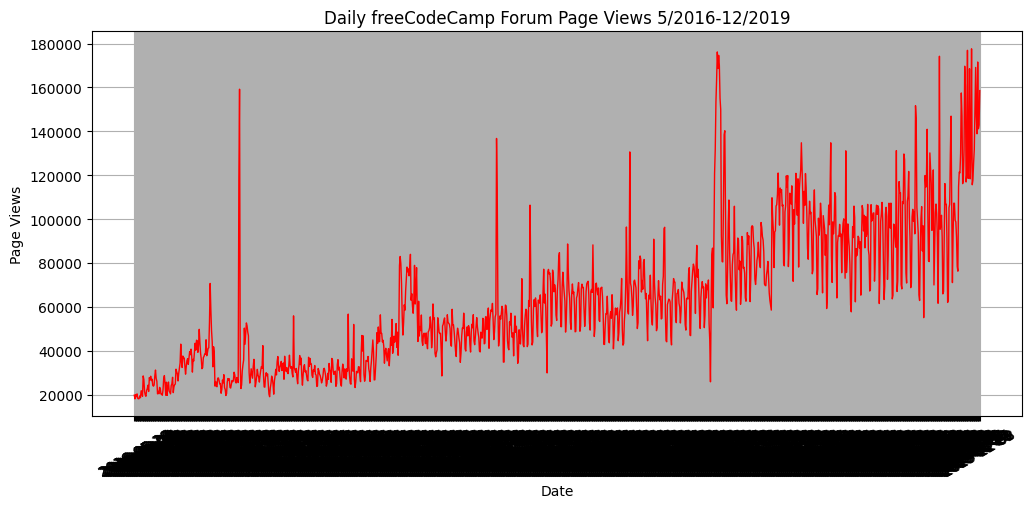

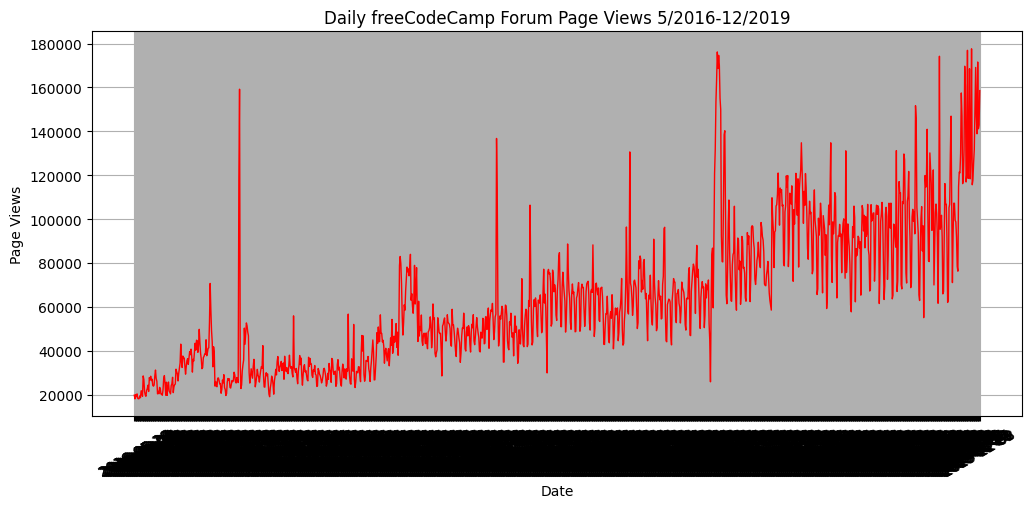

In [41]:
draw_line_plot()

In [42]:
def draw_bar_plot():

    df_bar = df_clean.copy()
    df_bar.index = pd.to_datetime(df_bar.index) 
    df_bar["Year"] = df_bar.index.year
    df_bar["Month"] = df_bar.index.month

    df_grouped = df_bar.groupby(["Year", "Month"])["value"].mean().unstack()

    fig, ax = plt.subplots(figsize=(10, 6))
    df_grouped.plot(kind="bar", ax=ax)
    
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.set_title("Average daily page views per month")
    ax.legend(title="Months", labels=[
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ])

    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.savefig("bar_plot.png")
    plt.close(fig)
    
    return fig

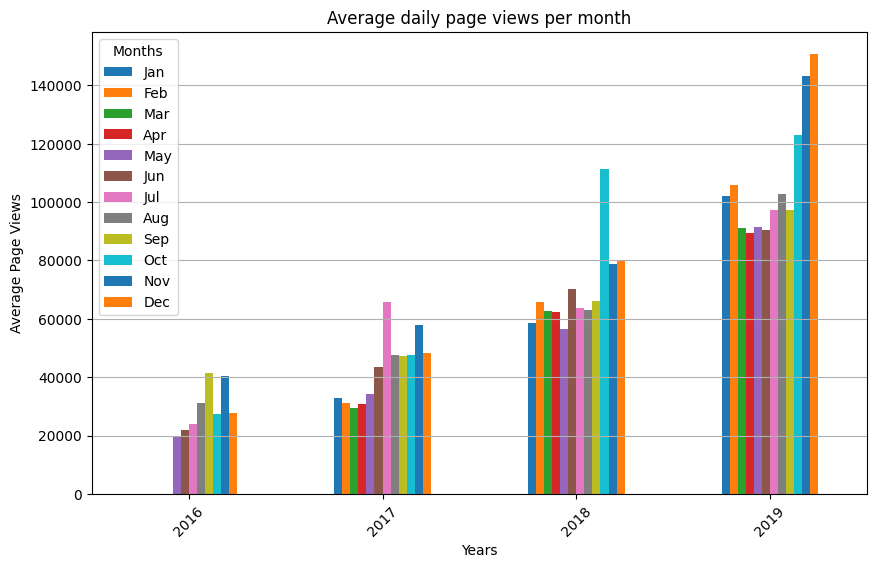

In [43]:
draw_bar_plot()

In [45]:
def draw_box_plot():
    
    df_box = df_clean.copy()
    df_box.index = pd.to_datetime(df_box.index)
    df_box["Year"] = df_box.index.year
    df_box["Month"] = df_box.index.strftime("%b")  # "Jan", "Feb", dll.
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x="Year", y="value", data=df_box, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    sns.boxplot(x="Month", y="value", data=df_box, ax=axes[1], order=month_order)
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    plt.savefig("box_plot.png")
    plt.close(fig)

    return fig

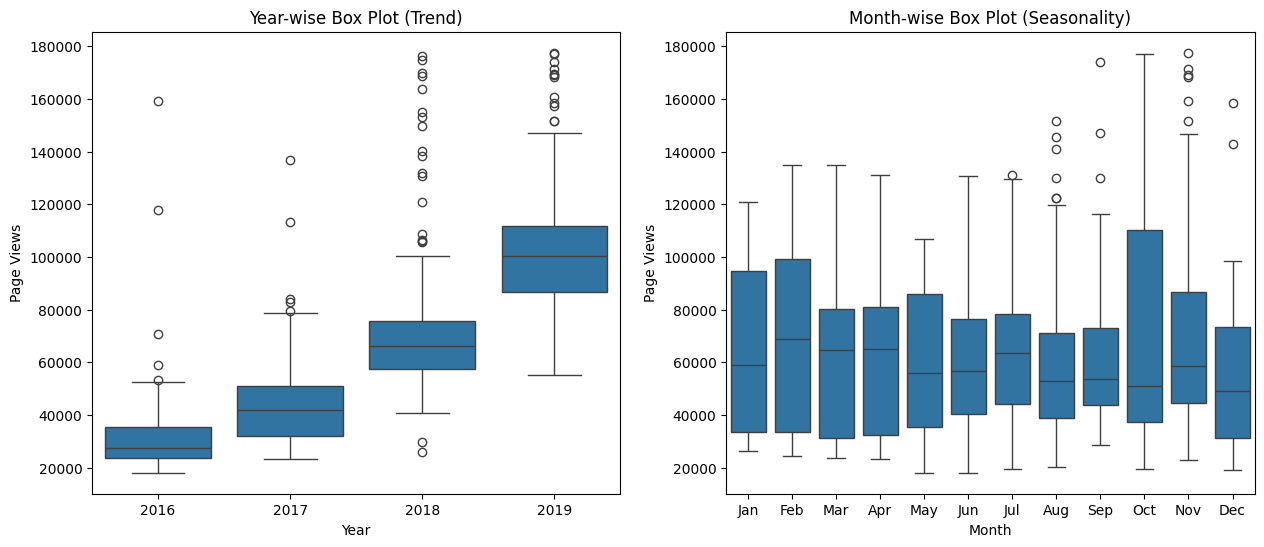

In [46]:
draw_box_plot()